# Exploring and Analysing House Pricing Data

Date:  18 Aug 2017 
 
Version: 1

Environment: R 3.3.2 and Jupyter notebook


## Introduction
This notebook  deals about **Exploratory Data Analysis** and **Linear Regression**. This includes reading and parsing CSV Files, determining and analyzing different variables in the dataset, finding statistics and relationship between variables, and finally creating a robust model in order to predict an unknown or future (target) value by using Linear Regression.

**Exploratory Data Analysis** is an important part of the Data Science Process. It  enables data scientists to familiarize themselves with the data they are going to work with in order to know the best approach in data analysis. Usually, it is under the umbrella of **Data Wrangling**, which is considered the most crucial part of Data Science--since the values derived from analyzing the data is wasted if the underlying data has not been cleaned and pre-processed properly.

**Linear Regression** is one of the classical approaches to supervised learning. It is used to predict a continuous output from a set of both quantitative and qualitative inputs by assuming a linear relationship between them. As it is one of the basic ways of modelling for data analysis, mastering how to implement it is vital for someone aspiring to be a Data Scientist.

The **data used** is a CSV file that resembles a table of house prices from May 2014 to May 2015. The data will be further described in the following exploratory data analysis. Linear regression will be used to predict house prices from the set of features.


## Contents
1. Importing the Data
2. Exploratory Data Analysis
    <br/>2.1 Enumerating variables and determining variable type
    <br/>2.2 Finding statistics per variable (to determine the distribution of values)
    <br/>2.3 Performing pictorial representations per variable
    <br/>2.4 Determining outliers and other possible issues
    <br/>2.5 Determining any association between variables
3. Linear Regression
    <br/>3.1 Checking the relationship between the input variables and the target variables
    <br/>3.2 Determining how strong the relationship is
    <br/>3.3 Filtering irrelevant input variables
    <br/>3.4 Checking for the synergy among the input variables
    <br/>3.5 Checking the linearity (or non-linearity) of the relationship
4. Testing and Validation
5. Conclusion

In [1]:
# information about the R kernel and machine used
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.2            magrittr_1.5        IRdisplay_0.4.4    
 [4] pbdZMQ_0.2-6        tools_3.3.2         crayon_1.3.2       
 [7] uuid_0.1-2          stringi_1.1.5       IRkernel_0.8.7.9000
[10] jsonlite_1.5        stringr_1.2.0       digest_0.6.12      
[13] repr_0.12.0         evaluate_0.10.1    

In [2]:
# import libraries
library(psych)
library(plyr)
library(ggplot2)
library(gridExtra)
library(car)

Warning message:
"package 'psych' was built under R version 3.3.3"Warning message:
"package 'plyr' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'gridExtra' was built under R version 3.3.3"Warning message:
"package 'car' was built under R version 3.3.3"
Attaching package: 'car'

The following object is masked from 'package:psych':

    logit



## 1. Importing the Data

This part comprises the following tasks:
1. Reading that 'training.csv' CSV file into R
2. Converting the 'training.csv' CSV file into a dataframe
3. Initial Exploration of the data

### 1.1 Data Description

The data includes housing sales record of an unspecified location from May 2014 to May 2015. Based from the zipcodes, they might be from Washington, USA. In it includes the following information:

1. **id** - unique ID for each home sold
2. **price** - the price of each home sold (*assumed* to be in US Dollars)
3. **bedrooms** - the number of bedrooms of the property (in whole numbers)
4. **bathrooms** - the number of bathrooms of the property (may be a whole number or with decimals .25, .50, or .75 which indicate the proportion of toilets and showers in the house)
5. **sqft_living** - the total living space of the property; specifically the sum of sqft_above and sqft_basement (in square feet)
6. **sqft_lot** - the total lot space of the property (in square feet)
7. **waterfront** - indicates whether the property is located in front of a body of water (river, lake, sea, etc.; 0 for no, 1 for yes)
8. **condition** - the state of the house according to the property assesors (an index from 1 to 4, 4 being the highest)
9. **grade** - the state of building construction (an index from 1 to 13, 13 being the highest)
10. **yr_build** - the year when the house was initially built
11. **zipcode** - the postcode of the area where the house is located.

### 1.2 Data Import
To import the data, I used R's `read.csv()` function. This function allows CSV (comma-separated values) files to be imported into R where it is automatically converted into a dataframe.

In [3]:
training.file <- read.csv("training.csv")

In [4]:
head(training.file)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
5537200043,211000,4,1.00,2100,9200,0,3,7,1959,98168
2025700080,265000,3,2.50,1530,6000,0,4,7,1991,98038
2025049111,1440000,3,3.50,3870,3819,0,3,11,2002,98102
9482700075,800000,4,3.50,2370,3302,0,3,8,1926,98103
2856102105,1059500,5,3.25,3230,3825,0,3,9,2014,98117
3364900375,750000,2,1.00,1620,6120,0,3,7,1951,98115


## 2. Exploratory Data Analysis

This part comprises of getting to know the data to be modeled. After the data has been successfully imported into a data frame, a thorough investigation is needed to ensure that the data scientist is familiar with the data he/she will be munching for analysis. 

It comprises of the following tasks:

<br/>2.1 Enumerating variables and determining variable type 
<br/>2.2 Finding statistics per variable (to determine the distribution of values) 
<br/>2.3 Performing pictorial representations per variable 
<br/>2.4 Determining outliers and other possible issues 
<br/>2.5 Determining any association between variables

### 2.1 Enumerating variables and determining variable type

To get an initial overview of the resulting dataframe, check the following:
- dimensions of the dataframe (how many rows of records? how many columns?)
- the initial parsing of the data (what are the data types?)
- are the data in the correct format?

#### Dimensions of the Dataframe

To check for the dimension, the function `dim()` is used. This function accepts a data frame and outputs the dimensions in *rows* x *columns*.

In [5]:
dim(training.file)

[1] 10000    11

This says that the data has **10,000** house sales records with **11 features**: id, price, bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, condition, grade, yr_built, zipcode. These features have aleady been described earlier.

To get the initial (parsed) data types, use the `str()` function.

In [6]:
str(training.file)

'data.frame':	10000 obs. of  11 variables:
 $ id         : num  5.54e+09 2.03e+09 2.03e+09 9.48e+09 2.86e+09 ...
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


#### Evaluating Variable Types

Based from the Week 2 lecture, variable types are mainly segregated into **numerical (quantitative)** and **categorical (qualitative)**. Numerical variables answer the question *'how many?'* or *'how much?'* and are any variable which can be measured, counted, ordered, *and* perform arithmetic operations upon. Categorical variables, meanwhile, answer the question *'what type'* or *'which category?'*. These variables can be ordered, sorted, *or* categorized.

Furthermore, numerical variables can be classified into **continuous** or **discrete**. Continuous variables are usually <u>measured</u> and take on any value between an interval, while discrete variables are <u>counted</u> and is based on a set of distinct values.

Categorical variables are furthered classified into **ordinal** or **nominal**. Ordinal variables can be arranged into a logical order, while nominal variables cannot (there is no hierarchy between values).


**Which variables are numerical?**

The following variables are numerical:
* price - discrete
* bedrooms - discrete
* bathrooms - discrete
* sqft_living - continuous
* sqft_lot - continuous


**Which variables are categorical?**

The following variables are categorical:
* id - nominal (it seems there's no inherent order)
* waterfront - nominal (I can argue that waterfront properties are as beautiful as non-waterfront properties, so no inherent order is observed)
* condition - ordinal
* grade - ordinal
* yr_built - ordinal (can be arranged from earliest to latest.) 
<br/>Note: I did not classify this as numerical because you cannot perform arithmetic operations on it. For example, you cannot multiply nor divide a year by 2, compute average year, etc.; *number of years* is numerical but not the year itself. 
* zipcode - nominal (there's no inherent hierarchy among the values)

**Reflections**
* In looking at the dataset, there are more numerical variables than categorical variables.
* Most of the variables are discrete variables.
* The categorical variables *id* and *zipcode* need to be converted into `char` since they are nominal variables. 
* Meanwhile, *yr_built* can just be an integer since there is an inherent order in it. 
* Zipcode, being a qualitative variable will be computationally costly when a linear regression model is built, because it features a lot of distinct values.

In [7]:
# convert zipcode as character
training.file['id'] <- sapply(training.file['id'], as.character)
training.file['zipcode'] <- sapply(training.file['zipcode'], as.character)
str(training.file)

# is there any null ID or zipcode?
any(is.na(training.file['id']) || is.na(training.file['zipcode']))

'data.frame':	10000 obs. of  11 variables:
 $ id         : chr [1:10000, 1] "5537200043" "2025700080" "2025049111" "9482700075" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "id"
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : chr [1:10000, 1] "98168" "98038" "98102" "98103" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "zipcode"


[1] FALSE

### 2.2 Finding statistics per variable (to determine the distribution of values)

Now that the variables are in their expected data type, we can now proceed to looking at the general statistics of the data. To do this, the methods `summary()` or `describe()` can be used. This gives out initial descriptive statistics like *minimum, maximum mean, median, quartiles, etc.* per column.

In [8]:
summary(training.file)

       id.id           price            bedrooms        bathrooms    
 1139600270:   2   Min.   :  78000   Min.   : 0.000   Min.   :0.000  
 1446403850:   2   1st Qu.: 320000   1st Qu.: 3.000   1st Qu.:1.750  
 1721801010:   2   Median : 450000   Median : 3.000   Median :2.250  
 1901600090:   2   Mean   : 541434   Mean   : 3.373   Mean   :2.113  
 1995200200:   2   3rd Qu.: 649950   3rd Qu.: 4.000   3rd Qu.:2.500  
 2023049218:   2   Max.   :6885000   Max.   :10.000   Max.   :8.000  
 (Other)   :9988                                                     
  sqft_living       sqft_lot        waterfront       condition    
 Min.   :  370   Min.   :   520   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 1430   1st Qu.:  5058   1st Qu.:0.0000   1st Qu.:3.000  
 Median : 1920   Median :  7620   Median :0.0000   Median :3.000  
 Mean   : 2080   Mean   : 14947   Mean   :0.0077   Mean   :3.407  
 3rd Qu.: 2545   3rd Qu.: 10642   3rd Qu.:0.0000   3rd Qu.:4.000  
 Max.   :13540   Max.   :982998   Max.

In [9]:
round(describe(training.file), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id*,1,10000,4.590594e+09,2.868528e+09,3.905101e+09,4.510949e+09,3.562391e+09,1000102,9842300095,9841299993,0.237,-1.261,28685283.620
price,2,10000,5.414345e+05,3.683079e+05,4.500000e+05,4.833585e+05,2.224641e+05,78000,6885000,6807000,3.871,30.397,3683.079
bedrooms,3,10000,3.373000e+00,9.130000e-01,3.000000e+00,3.340000e+00,1.483000e+00,0,10,10,0.511,1.794,0.009
bathrooms,4,10000,2.113000e+00,7.640000e-01,2.250000e+00,2.073000e+00,7.410000e-01,0,8,8,0.454,1.004,0.008
sqft_living,5,10000,2.080232e+03,9.158000e+02,1.920000e+03,1.986522e+03,8.154300e+02,370,13540,13170,1.454,5.497,9.158
sqft_lot,6,10000,1.494731e+04,3.863758e+04,7.620000e+03,8.234971e+03,3.884412e+03,520,982998,982478,10.536,167.084,386.376
waterfront,7,10000,8.000000e-03,8.700000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,11.262,124.852,0.001
condition,8,10000,3.407000e+00,6.510000e-01,3.000000e+00,3.304000e+00,0.000000e+00,1,5,4,0.980,0.579,0.007
grade,9,10000,7.657000e+00,1.184000e+00,7.000000e+00,7.584000e+00,1.483000e+00,3,13,10,0.736,1.033,0.012
yr_built,10,10000,1.970877e+03,2.945300e+01,1.975000e+03,1.972936e+03,3.410000e+01,1900,2015,115,-0.460,-0.679,0.295


#### Observation
* Six houses were sold twice as six distinct ids appeared twice on the record.
* The cheapest house was priced at \$78,000 while the most expensive house was sold at \$6,885,000.
* The average house price from May 2014 to May 2015 is around \$450,000 - \$550,000.
* The average living area is around ~2000 sqft. The mean and median are close because the range of the values is small (13,170).
* The average lot area, meanwhile is around ~7500 sqft. The mean of the lot may have been affected by extreme values, as the range is big (982,478) so its difference from the median is huge.
* There are houses with no bedrooms or bathrooms (odd), while there are palatial houses with up to 10 bedrooms and 8 bathrooms.
* On average, a house usually has 3 bedrooms and 2 bathrooms.
* The oldest house was built in 1900 while the most recently built house was from 2015.
* 15% of the houses are just from five different postcodes--98042, 98103, 98115, 98117, and 98038. Which speaks about the area's population/development.

## 2.3 Performing pictorial representations per variable

To better understand the data, we can take a look at the frequency table of some variables using the `count()` function. Histograms `hist()` are also appropriate for variables that  take on a large number of values. The package `ggplot2` offers a nicer histogram (`geom_histogram()`), so it may be better to use it over `hist()`.

In [10]:
# count outputs the relative frequency table of a variable/column
count(training.file['bedrooms'])

bedrooms,freq
0,6
1,93
2,1292
3,4497
4,3203
5,753
6,129
7,16
8,5
9,4


In [11]:
count(training.file['waterfront'])

waterfront,freq
0,9923
1,77


In [12]:
count(training.file['condition'])

condition,freq
1,19
2,89
3,6462
4,2664
5,766


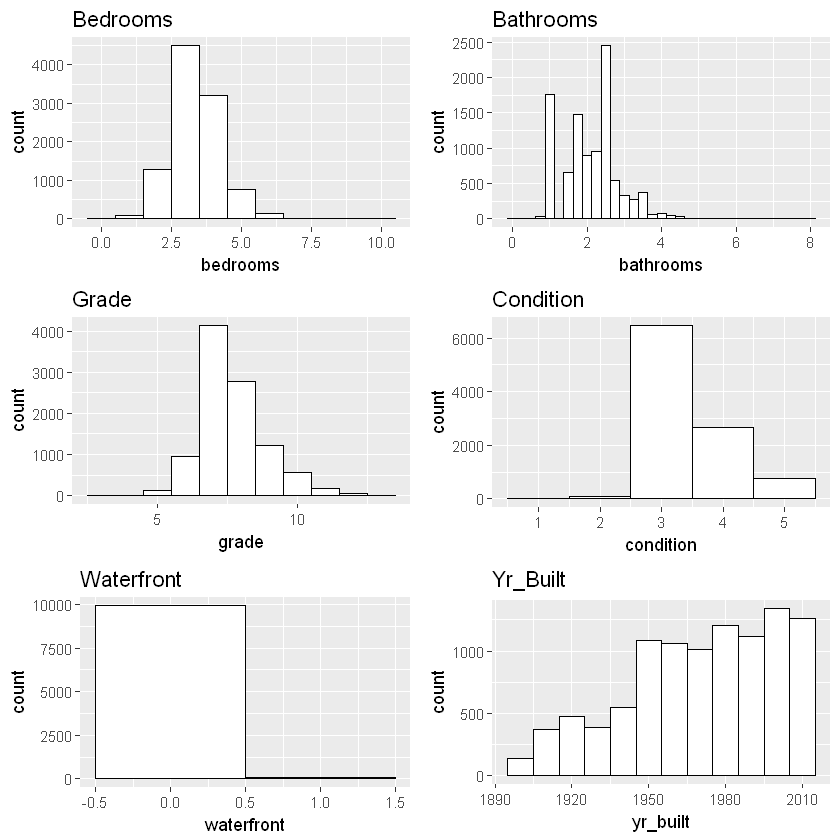

In [13]:
# ggplot enables histogram and various plot to be produced from the dataframe
q1<-ggplot(aes(x=bedrooms), data =  training.file) +
    geom_histogram(color =I('black'),fill = "White", binwidth = 1) +
    ggtitle('Bedrooms')

q2<-ggplot(aes(x=bathrooms), data =  training.file) +
    geom_histogram(color =I('black'),fill = "white", binwidth = 0.25) +
    ggtitle('Bathrooms')

q3<-ggplot(aes(x=grade), data =  training.file) +
    geom_histogram(color =I('black'),fill = "white", binwidth = 1) +
    ggtitle('Grade')

q4<-ggplot(aes(x=condition), data =  training.file) +
    geom_histogram(color =I('black'),fill = "white", binwidth = 1) +
    ggtitle('Condition')

q5<-ggplot(aes(x=waterfront), data =  training.file) +
    geom_histogram(color =I('black'),fill = "white", binwidth = 1) +
    ggtitle('Waterfront')

q6<-ggplot(aes(x=yr_built), data =  training.file) +
    geom_histogram(color =I('black'),fill = "white", binwidth = 10) +
    ggtitle('Yr_Built')

# use grid.arrange to arrange the histograms nicely
grid.arrange(q1,q2,q3,q4,q5,q6,ncol=2)

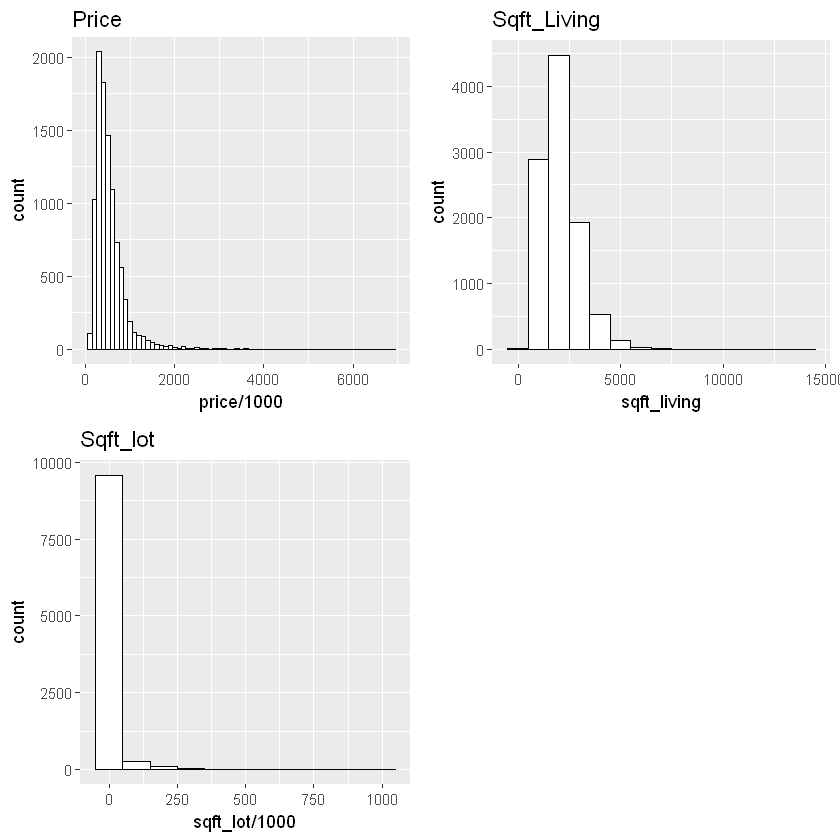

In [14]:
# divide the price by 1000 for readability
q7 <-ggplot(aes(x=price/1000), data =  training.file)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 100)+
    ggtitle('Price')

q8 <-ggplot(aes(x=sqft_living), data =  training.file)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 1000)+
    ggtitle('Sqft_Living')

# divide sqft_lot by 1000 for readability
q9 <-ggplot(aes(x=sqft_lot/1000), data =  training.file)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 100)+
    ggtitle('Sqft_lot')


grid.arrange(q7, q8, q9, ncol=2)

In [15]:
library(moments)
cat("Skewness of variables")
col.skewness <- function(x){return(skewness(x))}
sort(apply(training.file[2:6], 2, col.skewness))

Skewness of variables

bathrooms    bedrooms sqft_living       price    sqft_lot 
  0.4538498   0.5107739   1.4539101   3.8719820  10.5373945

#### Observations
* The majority of houses have **2 to 4 bedrooms** and **2 to 3 bathrooms**.
* There is a significant number of houses (around ~17%) with a **single bathroom**, which might correspond to studio apartments.
* **Almost all** of the houses are not situated near a body of water (waterfront == 0).
* **Price, Sqft_Living, and Sqft_Lot** are **positively skewed**. This corresponds to a *few* houses sold at an exorbitantly high price and houses that have a massive area. We may have a hard time creating a suitable model for this because skewed features are not linear--they tend to be more quadratic or higher. 
* Most of the houses are in **good condition** (condition == 3 or condition == 4) and of **average construction level and design** (grade between 6 to 8).
* A huge chunk of  houses were built after World War 2 (1950s onwards), but most of these houses were built in the last decade (2000s). 

#### Shape of the distribution
* Price - right skewed due to  outliers
* Bedrooms - resembles a normal distribution
* Bathrooms - resembles a right skewed distribution
* Sqft_Living - right skewed due to outliers
* Sqft_Lot - right skewed
* Condition - resembles a normal distribution
* Grade - resembles a normal distribution
* Yr_built - negatively skewed but almost uniform, as the spread is very wide

## 2.4 Determining outliers and other possible issues 

Based from the histogram above, *price, sqft_living, and sqft_lot* have skewed distribution due to outliers. 

To better understand them, a boxplot is created using the method `boxplot()`. This provides an overview about the distribution of data in relation to the mean and also gives us an idea about the number of outliers there are. 

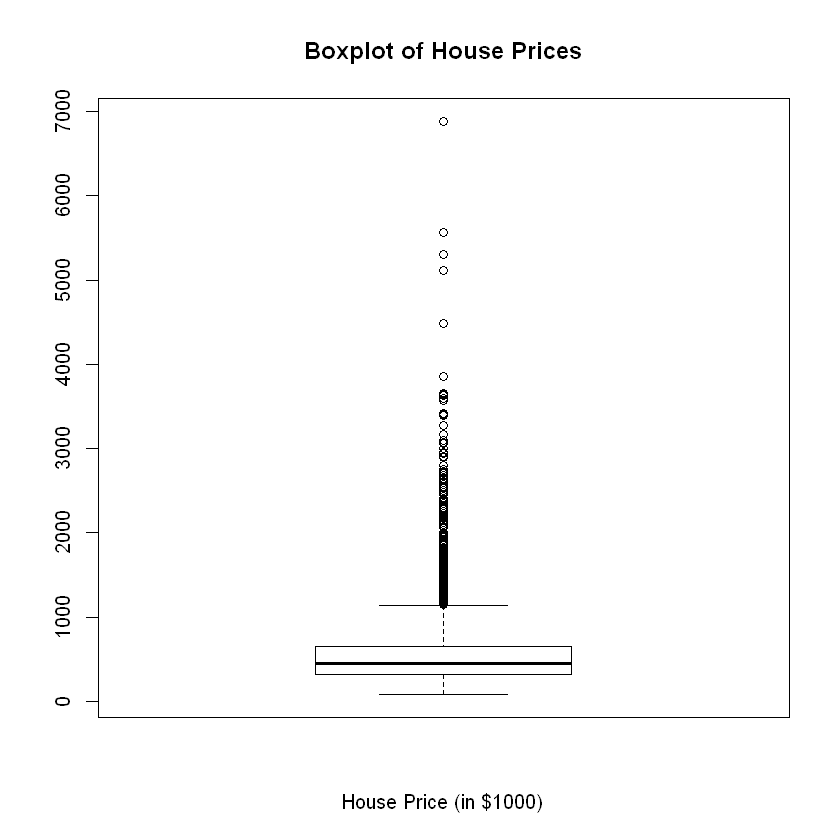

In [16]:
# divide the price by 1000 for readability
boxplot(training.file$price/1000, xlab = "House Price (in $1000)", main = "Boxplot of House Prices")

A number of houses have prices considered as *potential outliers*-- with prices more than **\$1,000,000**. This is driving the distribution to be right skewed, as the majority of houses are sold for less than \$1,000,000 (the median house price is again \$450,000). The noticeable outliers are houses whose prices are above \$4,000,000.

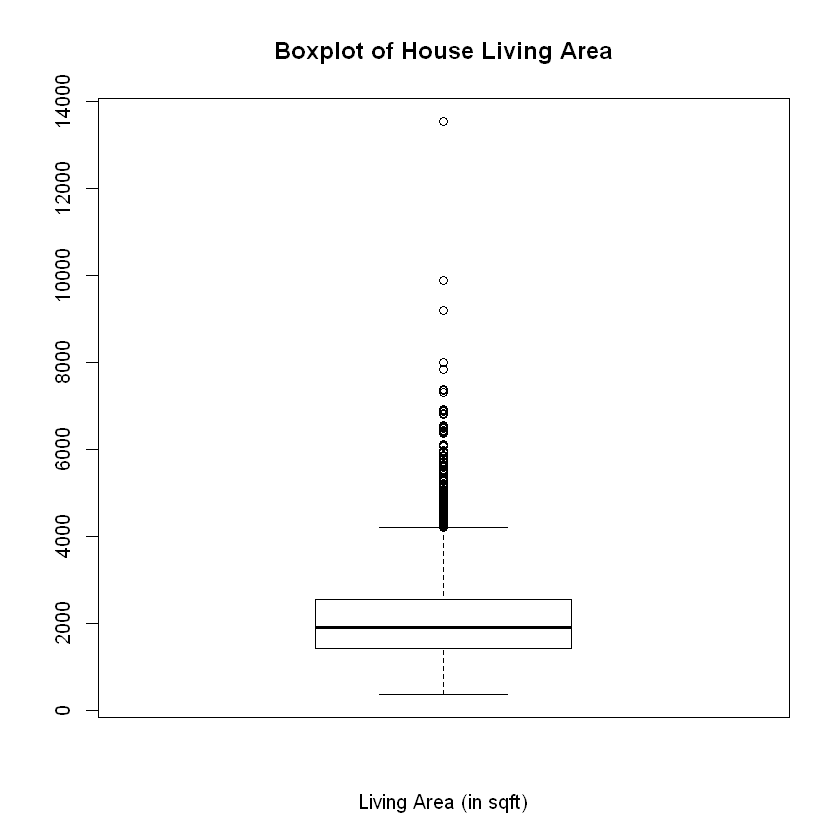

In [17]:
boxplot(training.file$sqft_living, xlab = "Living Area (in sqft)", main = "Boxplot of House Living Area")

On the other hand, the living area data is not as skewed. There were a number of *potential outliers* (houses whose area is greater than 4000 sqft), but the skewness is not as severe as the other two variables (price and lot area). The main data point that has affected the skewness of the data is the house with **14,000 sqft of living area** (quite spacious!), as it is vastly more spacious compared to the next highest with 10,000 sqft.

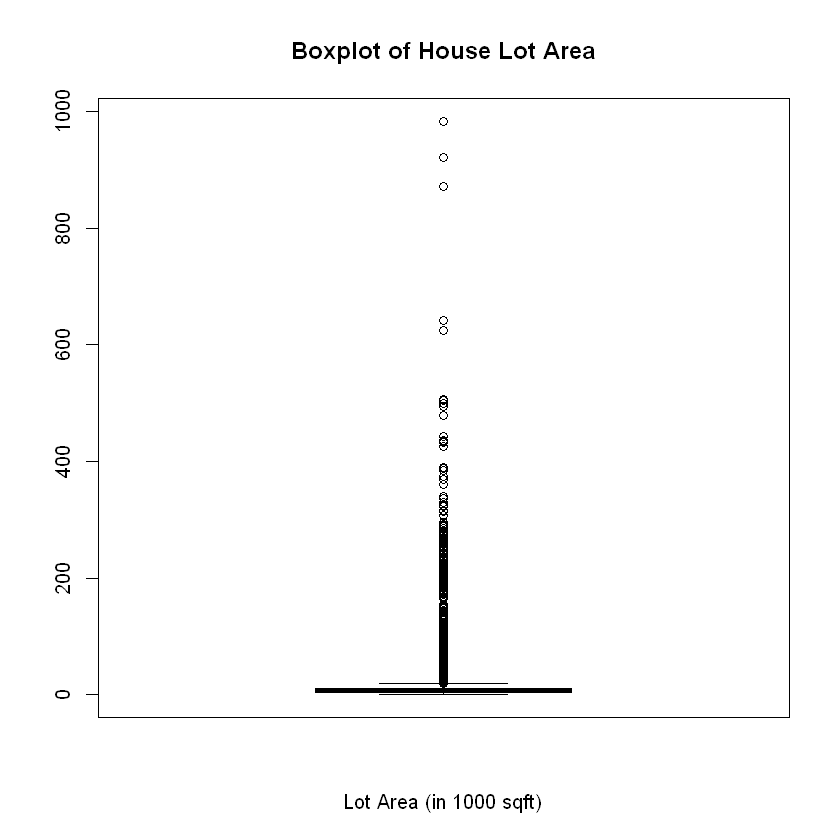

In [18]:
# divide the lot by 1000 for readability
boxplot(training.file$sqft_lot/1000, xlab = "Lot Area (in 1000 sqft)", main = "Boxplot of House Lot Area")

This variable has the worst skewness out of all. Five houses with more than 500,000 sqft has severely pushed the distribution from the right. This has made the boxplot pushed towards the bottom flat.

To remedy this, **data transformation** is needed. **Log transform** can be performed on price, sqft_living, and sqft_lot to make it less skewed. The function `log()` will get the natural logarithm $\log_e (x)$.

In [19]:
# preserve old data (for future plots)
training.data <- data.frame(training.file)

# log transform the data to make it less skewed
training.data$price <- log(training.file$price)
training.data$sqft_living <- log(training.file$sqft_living)
training.data$sqft_lot <- log(training.file$sqft_lot)

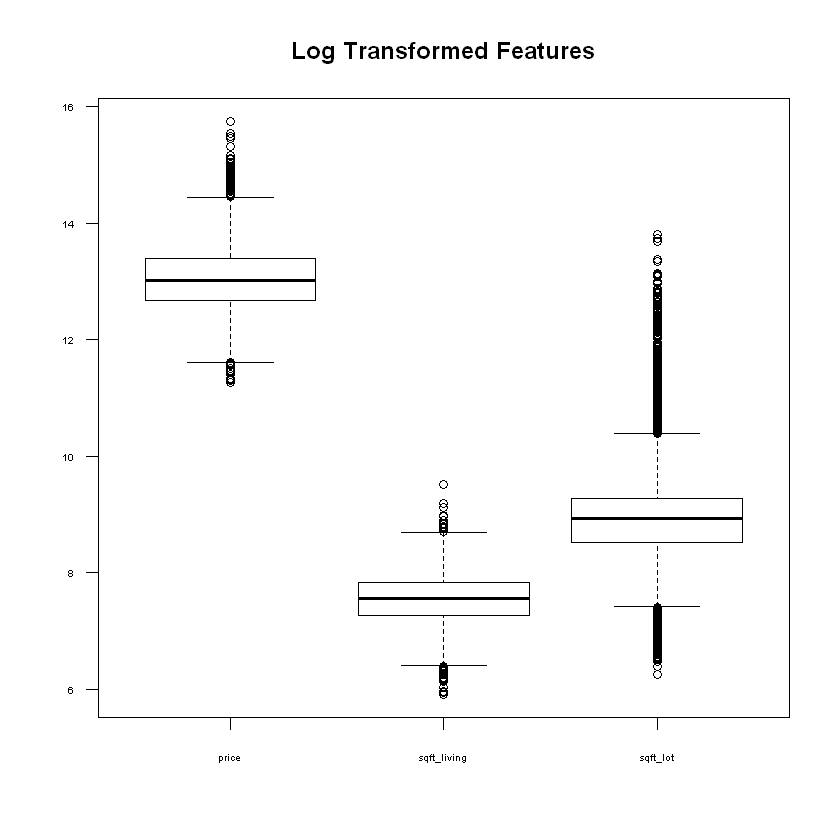

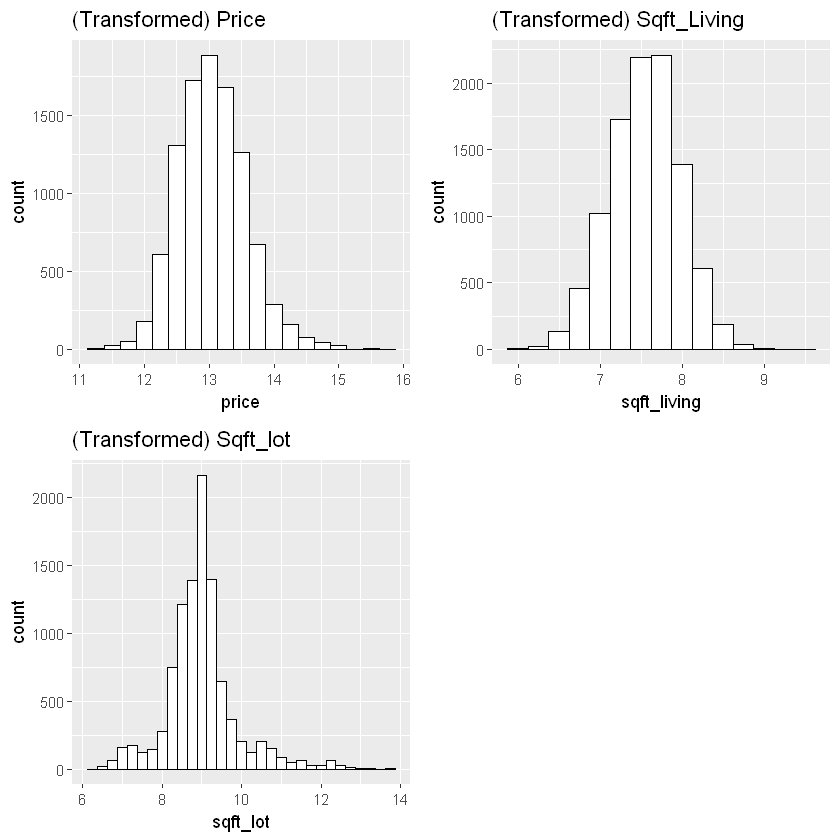

In [20]:
# show price, sqft_living, and sqft_lot's new boxplot
boxplot(training.data[, c(2,5,6)], las = 1, cex.axis = 0.5, main = "Log Transformed Features")

# show the histogram to check the distribution
q10 <-ggplot(aes(x=price), data =  training.data)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 0.25)+
    ggtitle('(Transformed) Price')

q11 <-ggplot(aes(x=sqft_living), data =  training.data)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 0.25)+
    ggtitle('(Transformed) Sqft_Living')

q12 <-ggplot(aes(x=sqft_lot), data =  training.data)+
    geom_histogram(color =I('black'),fill = "White", binwidth = 0.25)+
    ggtitle('(Transformed) Sqft_lot')


grid.arrange(q10, q11, q12, ncol=2)

As seen above, log transform really did make the distribution normal.

Also, because the variable *id* is a nominal variable that's just used to label the observations, it's better to exclude it from the data.

In [21]:
# extract the data for producing the model
training.data <- training.data[-1]

In [22]:
head(training.data)

price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
12.25961,4,1.00,7.649693,9.126959,0,3,7,1959,98168
12.48749,3,2.50,7.333023,8.699515,0,4,7,1991,98038
14.18015,3,3.50,8.261010,8.247744,0,3,11,2002,98102
13.59237,4,3.50,7.770645,8.102284,0,3,8,1926,98103
13.87331,5,3.25,8.080237,8.249314,0,3,9,2014,98117
13.52783,2,1.00,7.390181,8.719317,0,3,7,1951,98115


## 2.5 Determining any association between variables

### 2.5.1 Relationship of numerical variables

To check if there is a *linear relationship* between numerical variables, we need to compute for the **correlation coefficient**. R makes it easy for us by just calling the `cor()` function. A value of **1** implies heavy positive linear correlation, **-1** for heavy negative linear correlation, while a value close to **0** implies weak or no linear correlation.

In [23]:
# compute correlation for numerical variables
round(cor(training.file[2:10]), 3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built
price,1.000,0.323,0.525,0.696,0.094,0.295,0.033,0.669,0.061
bedrooms,0.323,1.000,0.522,0.591,0.035,-0.003,0.029,0.367,0.145
bathrooms,0.525,0.522,1.000,0.751,0.089,0.075,-0.127,0.670,0.510
sqft_living,0.696,0.591,0.751,1.000,0.187,0.120,-0.063,0.765,0.322
sqft_lot,0.094,0.035,0.089,0.187,1.000,0.027,-0.017,0.117,0.058
waterfront,0.295,-0.003,0.075,0.120,0.027,1.000,0.015,0.085,-0.018
condition,0.033,0.029,-0.127,-0.063,-0.017,0.015,1.000,-0.150,-0.364
grade,0.669,0.367,0.670,0.765,0.117,0.085,-0.150,1.000,0.452
yr_built,0.061,0.145,0.510,0.322,0.058,-0.018,-0.364,0.452,1.000


#### Observations

**Which of the following displayed positive correlation?**
- bathrooms x sqft_living (0.760)
- sqft_living x grade (0.748)
- price x sqft_living (0.696)
- bathrooms x grade (0.670)
- price x grade (0.669)
- sqft_living x bedrooms (0.636)
- bedrooms x sqft_living(0.591)
- price x bathrooms (0.525)
- bedrooms x bathrooms (0.522)
- bathrooms x yr_built (0.510)

**Which of the following displayed negative correlation?**
- None. The lowest was the relationship between condition and yr_built (does newer houses tend to have bad condition?), but it's still less than -0.5 to even warrant such correlation. The remaining pairs exhibited weak to no linear correlation.

**Which variables exhibited most correlation towards other variables?**
- Sqft_living, bathrooms, grade and price are the variables that exhibited the most number of correlations among other variables. The variables bedroom, sqft_lot, and yr_built exhibited moderate correlation with other variables.

**Which variables exhibited weak to no correlation towards other variables?**
- Waterfront, and condition gave almost no correlation to other variables. This makes it highly probable to be irrelevant to the model that will be built later.

Another way of checking for the correlation is to plot the two variables against each other via a scatterplot. To do this over the whole dataset a multivariate scatter plot is produced by using the `pairs()` function or the `scatterplotMatrix()` function. In this scenario, I will use the scatterplotMatrix because it also features a regression line which may be insightful for the model we'll build.

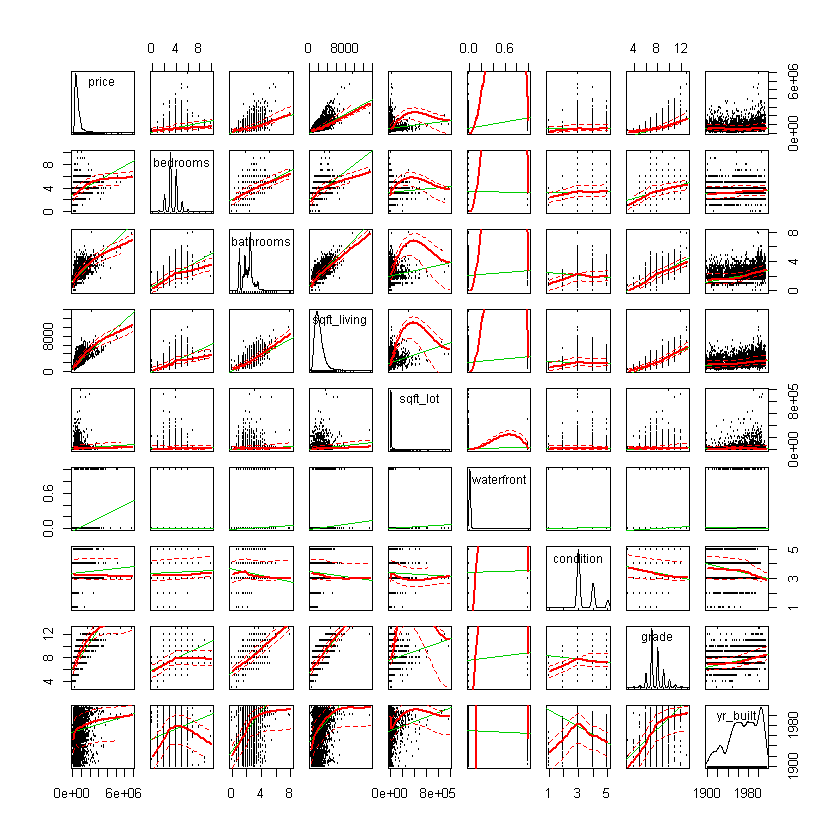

In [24]:
# turn off warnings for readability
options(warn=-1)
scatterplotMatrix(training.file[2:10],cex=0.2)
options(warn=0)

To see the linearity of the relationship, it might be better to see a magnified scatterplot of the variables with high correlations.

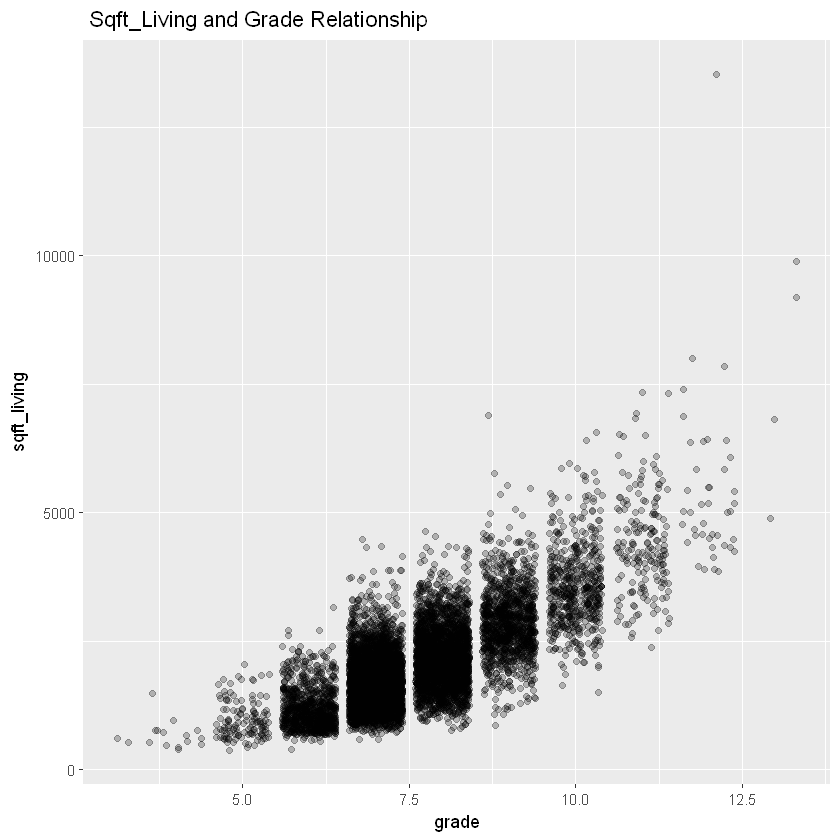

In [25]:
ggplot(aes(x = grade, y = sqft_living), data = training.file) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Sqft_Living and Grade Relationship')

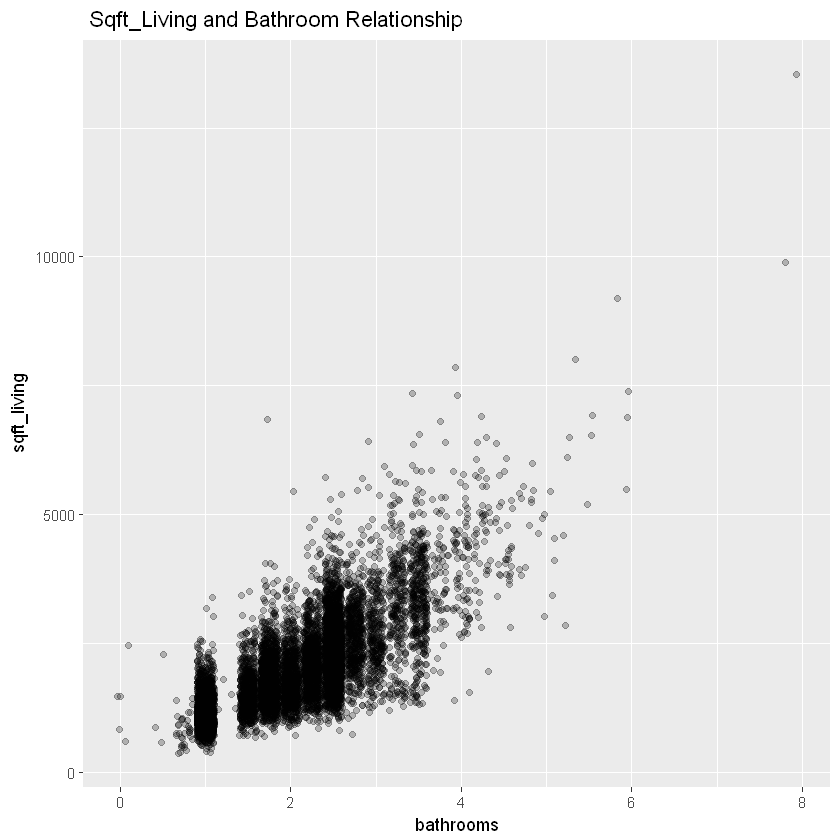

In [26]:
ggplot(aes(x = bathrooms, y = sqft_living), data = training.file) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Sqft_Living and Bathroom Relationship')

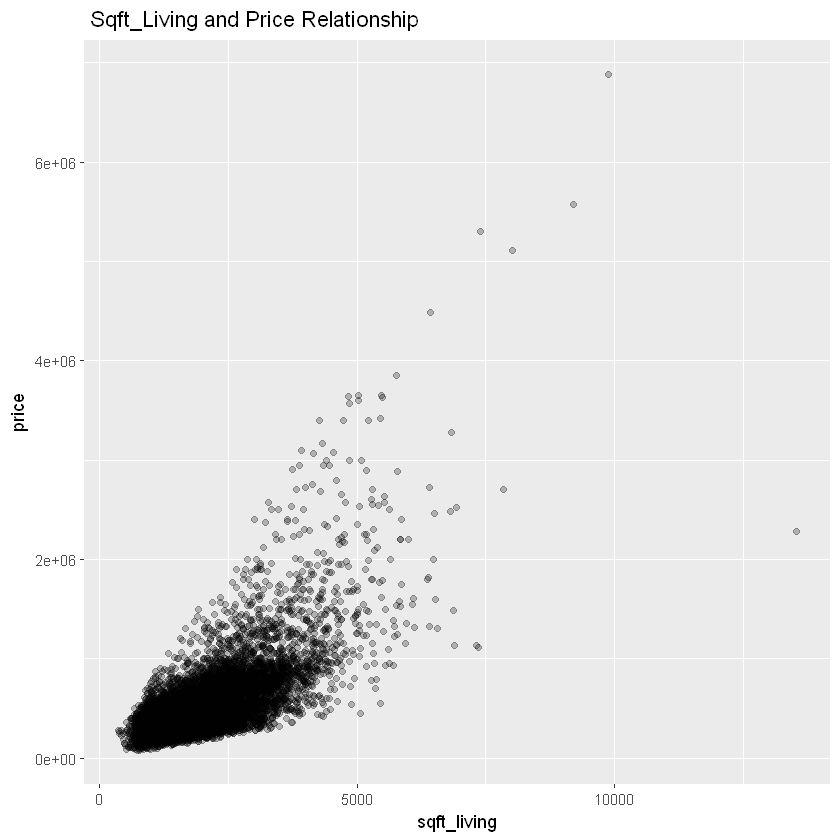

In [27]:
ggplot(aes(x = sqft_living, y = price), data = training.file) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Sqft_Living and Price Relationship')

In this scatterplot, one can clearly see that the sqft_living is heavily skewed. A relationship does exist between the two variables, but it's hard to see if it's linear. 

The log transformed data makes the linear relationship more apparent.

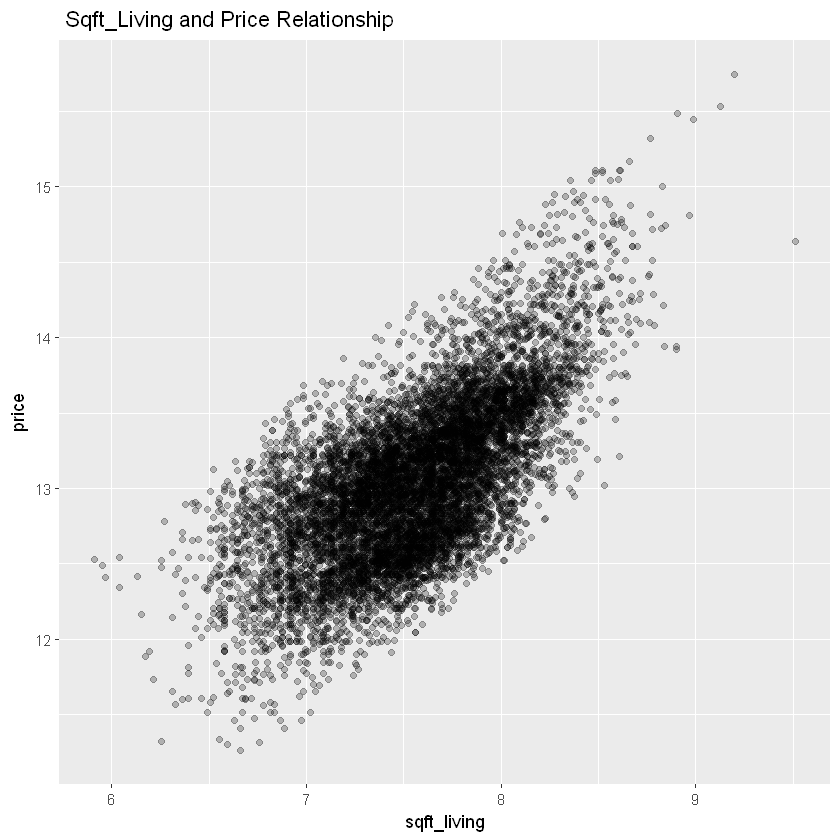

In [28]:
ggplot(aes(x = sqft_living, y = price), data = training.data) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Sqft_Living and Price Relationship')

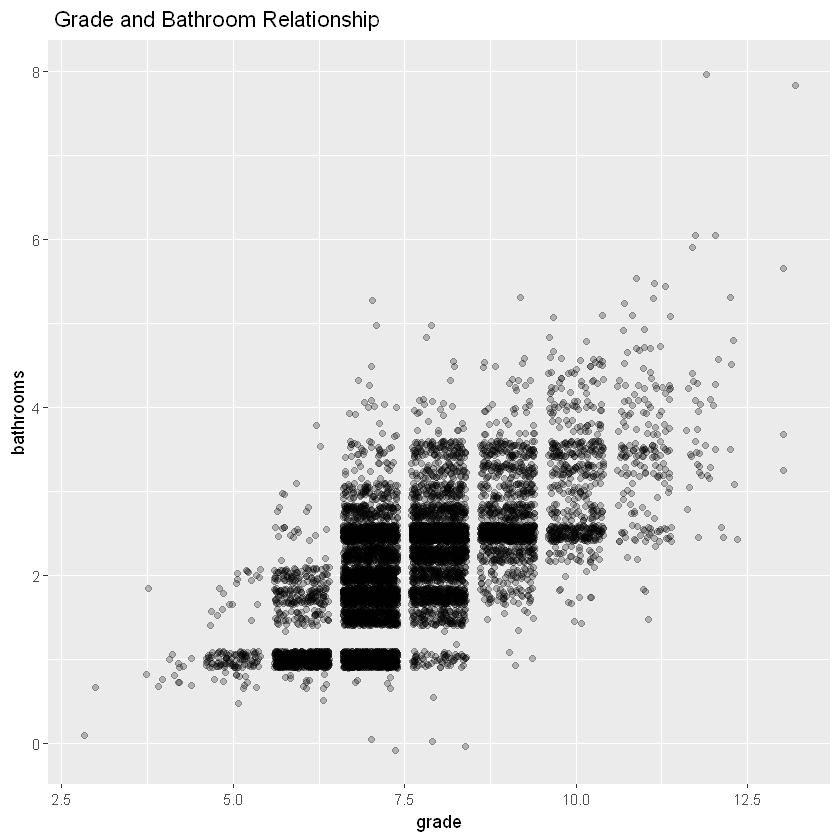

In [29]:
ggplot(aes(x = grade, y = bathrooms), data = training.data) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Grade and Bathroom Relationship')

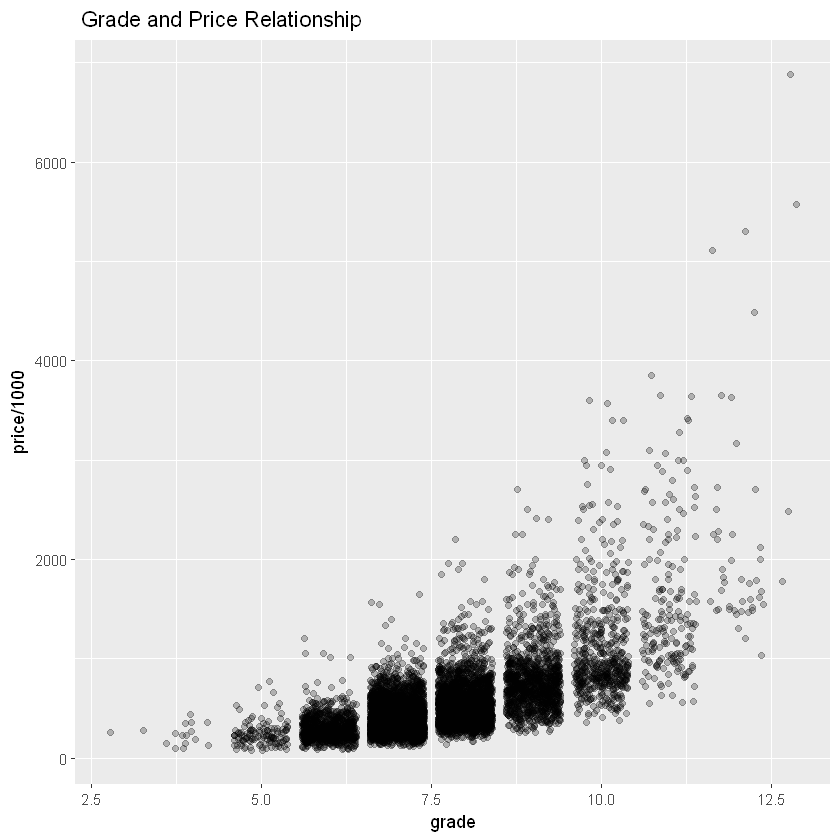

In [30]:
ggplot(aes(x = grade, y = price/1000), data = training.file) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle(' Grade and Price Relationship')

The relationship between price and grade is more quadratic than linear based from the graph above.

#### Observations

* Houses with high grades are almost equivalent to houses with more space. Does it mean that good design == lots of living space?
* Houses with bigger and more bathrooms have tend to have more space (common sense?)
* Price is highly correlated to the living space and grade, which is also a common knowledge -- the more space your house has, and the better constructed/designed it is, the higher it will sell.
* Price is also highly correlated to the number of bathrooms. So if you want to increase your house's value, just build another bathroom!
* Few houses are sold in front of a body of water, so it doesn't say much.
* Oddly, 'condition' does not give out any high correlation to price--it might be subjective in the first place. 
* The age of the house also doesn't have any bearing to a house's price. Well, there have been old (vintage!) and new (modern!) houses sold at high prices.
* However, the age of the house does have a moderate correlation with grade. Modern houses are considered better built due to technological advances in building design and construction.


### 2.5.2 Relationship of categorical variables

To check whether zipcode is related to other variables, **chi-square test of independence** is used. Information about chi-square is available on this <a href="http://www.r-tutor.com/elementary-statistics/goodness-fit/chi-squared-test-independence">link</a>. Chi-square statistic can be used to test the null hypothesis *"Attribute A and Attribute B is independent of each other"*. If the resulting p-value of the statistic is less than 0.05, then we can reject the null hypothesis.

Based on the result below, looks like all of the variables are related to zipcode. This says that location, indeed, can dictate the house price. A small house in an exclusive suburb can be more expensive than a big house in an unrestricted one. Furthermore, based on the p-values, zipcode is more strongly related to **bathrooms, grade, and yr_built**.

In [31]:
# turn off warnings for readability
options(warn=-1)

# perform chisquare test against zipcode to each of the variables
for(i in 1:9){
    m1 <- table(training.data$zipcode, training.data[,i])
    print(paste("zipcode and ", colnames(training.data[i])))
    print(chisq.test(m1)$p.value)
}
options(warn=0)

[1] "zipcode and  price"
[1] 2.11241e-45
[1] "zipcode and  bedrooms"
[1] 1.850787e-162
[1] "zipcode and  bathrooms"
[1] 0
[1] "zipcode and  sqft_living"
[1] 1.106781e-130
[1] "zipcode and  sqft_lot"
[1] 2.247835e-136
[1] "zipcode and  waterfront"
[1] 2.715047e-66
[1] "zipcode and  condition"
[1] 6.563891e-136
[1] "zipcode and  grade"
[1] 0
[1] "zipcode and  yr_built"
[1] 0


We can also checkout the relationship of zipcode with other functions by aggregating the dataset per zipcode value and then getting their median values. Through this we can analyze any **location specific insights.**

In [32]:
options(warn=-1)

# get median house prices per zipcode
mean.price.per.zipcode <- aggregate(training.file$price,
                 by = list(zipcode = training.file$zipcode), FUN = median)

# get the number of records per zipcode
count.per.zipcode <- aggregate(training.file$price,
                 by = list(zipcode = training.file$zipcode), FUN = length)
count.per.zipcode <- count.per.zipcode[order(count.per.zipcode$x),]

# get the mean sqft_living per zipcode
living.per.zipcode <- aggregate(training.file$sqft_living,
                 by = list(zipcode = training.file$zipcode), FUN = mean)
living.per.zipcode <- living.per.zipcode[order(living.per.zipcode$x),]

# get the median number of bathrooms per zipcode
bathrooms.per.zipcode <- aggregate(training.file$bathrooms,
                 by = list(zipcode = training.file$zipcode), FUN = median)
bathrooms.per.zipcode <- bathrooms.per.zipcode[order(bathrooms.per.zipcode$x),]

# get the mean sqft_lot per zipcode
lot.per.zipcode <- aggregate(training.file$sqft_lot,
                 by = list(zipcode = training.file$zipcode), FUN = mean)
lot.per.zipcode <- lot.per.zipcode[order(lot.per.zipcode$x),]

# get the median yr_built per zipcode
yr.per.zipcode <- aggregate(training.file$yr_built,
                 by = list(zipcode = training.file$zipcode), FUN = median)
yr.per.zipcode <- yr.per.zipcode[order(yr.per.zipcode$x),]

# get the median bedrooms per zipcode
bedrooms.per.zipcode <- aggregate(training.file$bedrooms,
                 by = list(zipcode = training.file$zipcode), FUN = median)
bedrooms.per.zipcode <- bedrooms.per.zipcode[order(bedrooms.per.zipcode$x),]

# get the median grade per zipcode
grade.per.zip <- aggregate(training.file$grade,
                 by = list(zipcode = training.file$zipcode), FUN = mean)
grade.per.zip <- grade.per.zip[order(grade.per.zip$x),]

# join the tables together
merged.data <- merge(mean.price.per.zipcode, count.per.zipcode, by = "zipcode")
merged.data <- merge(merged.data, living.per.zipcode, by = "zipcode")
merged.data <- merge(merged.data, bathrooms.per.zipcode, by = "zipcode")
merged.data <- merge(merged.data, yr.per.zipcode, by = "zipcode")
merged.data <- merge(merged.data, bedrooms.per.zipcode, by ="zipcode")
merged.data <- merge(merged.data, lot.per.zipcode, by = "zipcode")
merged.data <- merge(merged.data, grade.per.zip, by = "zipcode")

colnames(merged.data) <- c("zipcode", 
                           "price", 
                           "num.of.records", 
                           "sqft_living", 
                           "bathrooms", 
                           "yr_built",
                           "bedrooms", 
                           "sqft_lot", 
                           "grade")

# order the data by price
merged.data <- merged.data[order(merged.data$price),]

# view the cheapest locations
head(merged.data, 50)

# view the expensive locations
tail(merged.data, 50)

options(warn=0)

,zipcode,price,num.of.records,sqft_living,bathrooms,yr_built,bedrooms,sqft_lot,grade
65,98168,225000,125,1449.600,1.000,1949.0,3,11412.104,6.448000
2,98002,235000,90,1595.389,1.750,1968.0,3,7267.544,6.700000
21,98032,250000,57,1761.632,1.750,1967.0,3,9861.491,7.157895
1,98001,260000,165,1857.376,2.000,1983.0,3,14759.624,7.284848
3,98003,263000,122,1913.262,2.000,1977.5,3,9734.508,7.508197
67,98178,265000,115,1729.826,1.750,1951.0,3,8510.522,6.826087
69,98198,267500,132,1762.235,1.750,1963.5,3,10333.652,7.128788
14,98023,270000,244,1987.947,2.000,1978.0,3,9972.119,7.569672
68,98188,271225,74,1795.270,1.750,1961.0,3,9627.541,7.054054
62,98148,278000,27,1516.296,1.500,1954.0,3,8457.148,6.888889


,zipcode,price,num.of.records,sqft_living,bathrooms,yr_built,bedrooms,sqft_lot,grade
9,98010,340000,39,2069.590,2.00,1990.0,3,44340.949,7.487179
24,98038,345475,250,2181.860,2.50,2001.5,3,19600.596,7.608000
53,98118,365000,235,1687.996,1.75,1949.0,3,5989.251,6.970213
58,98133,373000,241,1619.041,1.75,1955.0,3,6872.664,7.112033
32,98056,380000,187,2033.075,2.00,1970.0,3,9136.556,7.294118
63,98155,386000,202,1780.743,1.75,1955.0,3,10260.257,7.183168
28,98045,391000,120,2050.542,2.00,1987.5,3,42149.475,7.558333
64,98166,393975,110,2090.282,1.75,1955.0,3,13313.318,7.445455
12,98019,396500,74,2101.257,2.50,1996.0,3,45999.851,7.351351
57,98126,399475,168,1550.018,1.50,1944.0,3,5266.690,7.053571


#### Observations

- As the prices increase, the average bathrooms, sqft_living, and grade increase as well.
- **Zipcode** also dictates the increase. Based from the table above, zipcode is strongly correlated to price, bathrooms and grade, and moderately correlated to the living area. 
- Based from this correlation, we can infer that expensive (and elegantly constructed) houses tend to cluster towards similar zipcodes/location. The same can also be said about cheap houses.
- The prime locations in the dataset have median houses at **\$750,000, with an average of 2.50 bathrooms and a grade of 8 and above.**
- On the other end of the spectrum, cheaper locations in the dataset have an average median house price of **\$250,000 with 1.75 bathrooms and a grade of 7 and below.**

## 3. Linear Regression

After exploring the data, it's now time to develop a model that can be used to predict future house prices.

This task will attempt to answer the following questions:

(the following questions are based from *An Introduction to Statistical Learning with Application in R (2013, Springer)*)

3.1 Is there a relationship between house features (number of bedrooms, number of bathrooms, sqft_living, sqft_lot, waterfront, condition, grade, yr_built and zipcode) and the house price?
<br/>3.2 How strong is the relationship?
<br/>3.3 Which feature(s) contribute to the house price?
<br/>3.4 Is there synergy among the house features?
<br/>3.5 Is the relationship linear?

### 3.1 Is there a relationship between house features and house price?

To answer this, we can fit an initial linear regression model using all the features by calling the `lm()` function. The `lm()` function inputs the regression formula and the data, and outputs a resulting regression class whose contents can be seen by calling the `summary()` method.

To determine if the relationship exists, we need to look at the resulting **F-statistic's p-value**. This statistic tests the null hypothesis *"The feature vector $X$ and target variable $Y$ is independent of each other."* A low p-value (< 0.05) indicates that a relationship indeed exists.

In [33]:
fit1 <- lm(price~., data = training.data)
summary(fit1)


Call:
lm(formula = price ~ ., data = training.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1688 -0.1039  0.0017  0.1042  1.0430 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.7664346  0.2292937  38.232  < 2e-16 ***
bedrooms     -0.0196099  0.0028730  -6.826 9.27e-12 ***
bathrooms     0.0455589  0.0044488  10.241  < 2e-16 ***
sqft_living   0.4339047  0.0097118  44.678  < 2e-16 ***
sqft_lot      0.0700761  0.0030569  22.924  < 2e-16 ***
waterfront    0.6677975  0.0225795  29.575  < 2e-16 ***
condition     0.0447345  0.0032714  13.674  < 2e-16 ***
grade         0.1260469  0.0028805  43.759  < 2e-16 ***
yr_built     -0.0006499  0.0001064  -6.106 1.06e-09 ***
zipcode98002  0.0055412  0.0250232   0.221  0.82475    
zipcode98003  0.0287796  0.0227488   1.265  0.20586    
zipcode98004  1.1512585  0.0218414  52.710  < 2e-16 ***
zipcode98005  0.7117336  0.0251554  28.293  < 2e-16 ***
zipcode98006  0.6910947  0.0197714  34.954  < 2e-16 **

Based on the **F-statistic's very low p-value**, there is a clear evidence of relationship between the house features and the resulting price. 

### 3.2 How strong is the relationship? 

To check how strong the relationship is, we need to check about the resulting residual standard error (RSE). RSE is an indicator of the average error that the model has from the true regression line. The RSE of the house sales data is \$166,100 while the mean value of the prices is \$541,434, indicating a percentage error of around 31%. 

Another good statistic for measuring the goodness of fit of the model is **$R^2$**, which explains how much of the variability in the prices is explained by the features. Based on the resulting value, the model explains **~ 87% of the variability in house prices**, which can be considered very robust!

### 3.3 Which feature contribute to the house prices?

The **t-statistic** is computed to test the null hypothesis *"There is no relationship between price $y$ and feature $x$"*. Looking at the **coefficients** of each feature and their resulting t-statistic p-value, **all features** look relevant to price as all have <u>p-values less than 0.05</u>.

#### Interpreting the Intercepts

In terms of the intercepts, it's interesting that both bedrooms and yr_built have **negative coefficients**. Based from the model, as the number of bedrooms decrease and the houses become older, the more expensive they become. Otherwise, an increase in the value of other features (sqft_living, sqft_lot, bathrooms, condition, waterfront and grade) also increases the value of a house. Lastly, most zipcodes (i.e. location) are important in dictating the price, but some zipcodes aren't. 

Although these initial fit already has a moderately good $R^2$, we can still improve upon the model by filtering the most relevant features. We can do this by using the `step()` function, which enables us to select the optimum features based on the resulting AIC of the model, more formally called as **stepwise selection/regression**. **AIC** or Akaike Information Criterion, measures the quality of a model, used primarily in model selection.

In general, the lower the AIC, the better the model.


In [34]:
fit2 <- step(fit1, direction = "both")

Start:  AIC=-33100.14
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + 
    condition + grade + yr_built + zipcode

              Df Sum of Sq    RSS    AIC
<none>                     359.50 -33100
- yr_built     1      1.35 360.86 -33065
- bedrooms     1      1.69 361.19 -33055
- bathrooms    1      3.80 363.30 -32997
- condition    1      6.78 366.28 -32915
- sqft_lot     1     19.04 378.54 -32586
- waterfront   1     31.69 391.20 -32257
- grade        1     69.38 428.88 -31338
- sqft_living  1     72.33 431.83 -31269
- zipcode     69    639.24 998.75 -23020


In [35]:
summary(fit2)


Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode, data = training.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1688 -0.1039  0.0017  0.1042  1.0430 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.7664346  0.2292937  38.232  < 2e-16 ***
bedrooms     -0.0196099  0.0028730  -6.826 9.27e-12 ***
bathrooms     0.0455589  0.0044488  10.241  < 2e-16 ***
sqft_living   0.4339047  0.0097118  44.678  < 2e-16 ***
sqft_lot      0.0700761  0.0030569  22.924  < 2e-16 ***
waterfront    0.6677975  0.0225795  29.575  < 2e-16 ***
condition     0.0447345  0.0032714  13.674  < 2e-16 ***
grade         0.1260469  0.0028805  43.759  < 2e-16 ***
yr_built     -0.0006499  0.0001064  -6.106 1.06e-09 ***
zipcode98002  0.0055412  0.0250232   0.221  0.82475    
zipcode98003  0.0287796  0.0227488   1.265  0.20586    
zipcode98004  1.1512585  0.0218414  52.710  < 2e-16 ***
zipcode

The method resulted in the initial model that we had. Seems like **all variables** are optimal to the model, according to the step function. 

Since our model still assumes that each feature is independent to other features *(additive relationship)*, looking for *interaction* or synergy among them might improve the resulting model.

### 3.4 Is there synergy among house features? 

To do this, it's best to analyze the correlations and tests of independence.

Based on the **exploratory data analysis** performed above, which features are related to price?

**sqft_living, bathrooms, grade, zipcode**

Since grade has the highest correlation to price, we need to check which features are also related to grade. They may be indirectly related to price.

**sqft_living, bathrooms, yr_built, bedrooms**

Since sqft_living has the second highest correlation to price, we can check out which features are related to sqft_living as well.

**bedrooms, bathrooms, grade**

**Zipcode** produced very low p-value when tested using chi-square, so this feature is also related to the other variables in a high degree.

Note that **sqft_lot** is also related to both **sqft_living** and **grade**, the two features with highest correlation to price.

To produce the most appropriate model, we had to take into account these interactions. I had to test different combinations and check which model would produce a high $R^2$ and the **lowest root mean squared-error** with the *least possible number of terms*.

### The Final Model

The final model I created consists of **all the features** plus the following interaction terms:

**sqft_living:grade:zipcode:yr_built** - Including sqft_living, grade, and zipcode as an interaction term makes sense. For new homebuyers, these provide answers to initial questions they have in house-hunting: Is the house big enough for their family? Is the build sturdy and design impeccable? Is it located in a prime and accessible location? 

The variable **yr_built** can be considered a *confounding variable*. From the exploratory data analysis it doesn't look much relevant to price, but I found that including this feature improves the root mean square error significantly. Maybe it is more related to **grade** than what the correlation matrix shows, and since price is dependent on grade a relationship must exist between price and yr_built.

**sqft_living:sqft_lot:grade** - After looking for other interaction terms, this combination also gave out a promising test result. *Big yet empty lots* does sell cheaper than a moderate lot with a nice house, but a *big lot with a big and elegant house* is sure to skyrocket the house price. So in a way this interaction is not *that* peculiar.

*Why are bedrooms and bathrooms not included?* 
Looks like homebuyers prioritize the house build and design over the number of rooms. Personally I'd prefer a house of bricks with a single room and bath than a wooden one with more rooms.

In summary, my model is:

`
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode + sqft_living:sqft_lot:grade + 
    sqft_living:grade:yr_built:zipcode, data = training.data)
    `
    
<br/>
<br/>It is  made up of **11 terms (inc. 2 interaction terms)** that has an **$R^2$** of around 88%.



In [36]:
fit3 <- update(fit2, .~. + sqft_living:grade:yr_built:zipcode + sqft_living:sqft_lot:grade)# $122074
summary(fit3)


Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode + sqft_living:sqft_lot:grade + 
    sqft_living:grade:yr_built:zipcode, data = training.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16983 -0.09815  0.00370  0.10269  0.91670 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              1.463e+01  4.376e-01  33.428  < 2e-16
bedrooms                                -1.641e-02  2.823e-03  -5.813 6.32e-09
bathrooms                                3.793e-02  4.424e-03   8.575  < 2e-16
sqft_living                              1.252e-02  2.614e-02   0.479 0.632067
sqft_lot                                 1.518e-01  1.299e-02  11.692  < 2e-16
waterfront                               6.277e-01  2.239e-02  28.034  < 2e-16
condition                                4.996e-02  3.247e-03  15.385  < 2e-16
grade                 

The resulting model improved the $R^2$ to almost 88%. Although the change is not high, an improvement is still an improvement. To quantify the improvement, we can use **ANOVA** test for the null hypothesis *"There is no statistical difference between model A and model B"*. Are the two models statistically different?

In [37]:
anova(fit2, fit3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
9922,359.5042,NA,NA,NA,NA
9851,337.2787,71,22.22553,9.142926,1.084681e-90


The very low p-value shows that there is indeed a difference.

### 3.5 Is the relationship linear?

Modelling via linear regression rests on the assumption that there is a linear relationship between the feature and target variables if the **residuals are normally distributed**. **Residual plots** are used to analyze whether such relationship exists.

The function `plot()` is used to show the **residuals vs fitted plot** (1) and the **normal qq plot** (2). According to the Week3 material, residuals assume normality if the distribution of points above and below the dashed line in the first plot is even. Normality is also assumed if the residuals' quantiles follow the theoretical quantiles (i.e. it follows the diagonal dashed line) in the second plot. 

Based from the residuals vs fitted plot, the residuals are *somehow* scattered evenly. This means the residuals' mean is almost 0, which *may* assume normality. However, the normal qq plot shows that the residuals are indeed **not normal**, because it deviates from the diagonal line on both ends. 

As shown in the exploratory data analysis, transforming the data is necessary due to the skewness of some of the variables. This implies that the dataset as is (without transforms) may not be best represented by linear regression. The scatterplots of the variables against each other also show this--the points follow a curve more than a line. 

Therefore, it can be said that the relationship is not really linear. Perhaps **polynominal regression** might perform better.

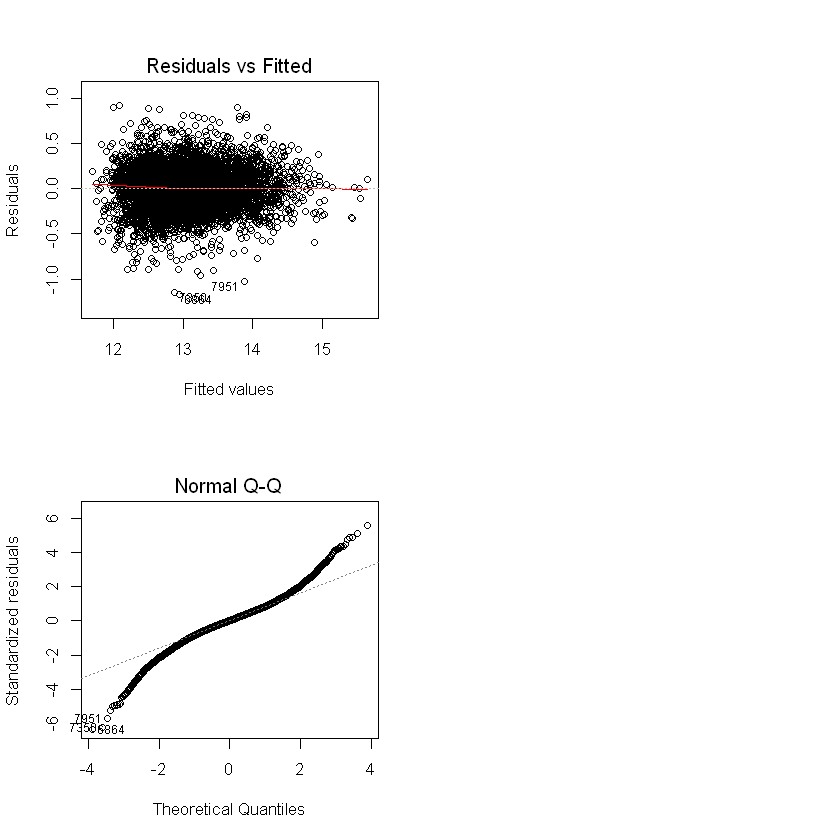

In [38]:
par(mfcol=c(2,2))
plot(fit3, which = 1)
plot(fit3, which = 2)

## 4. Testing and Validation

This part consists of testing the model created above (called `fit3`). The measure of accuracy used is the **root mean squared-error**, which gets the square root of the mean of the squared difference between the predicted value of the model and the actual value. In terms of equation, it is

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\widehat{Y_i}-Y_i)^2}
$$


The smaller the RMSE, the more robust the linear model is.

The 1000 records stored in a file called `dev.csv` will be used for validation, which is structured similarly to the training file `training.csv`. 

In [39]:
# read the testing file
testing.file <- read.csv('dev.csv')

# check contents
head(testing.file)

# how many number of rows?
nrow(testing.file)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
6641040100,1146800,4,3.50,4210,10308,0,3,10,2006,98008
1563102435,950000,3,1.75,2150,4200,0,5,8,1960,98116
524069101,850000,4,2.00,3380,90968,0,4,9,1979,98075
326069131,599000,4,2.50,2790,230868,0,3,8,1989,98077
5341600030,255000,2,1.00,960,28717,0,4,6,1984,98070
2270000070,280000,4,2.50,1560,4350,0,3,7,2003,98056


[1] 1000

In [40]:
# split the dataframe into data and values
testing.data <- testing.file[3:11]
testing.values <- testing.file[2]

I have defined a function called `get.rmse()` that accepts two dataframe parameters--the `predicted.values` will be the resulting dataframe of a model's predictions while the `actual.values` are the actual value of the target variables of that observation. This will return the root mean squared-error.

In [41]:
get.rmse <- function(predicted.values, actual.values){
    p.length <- length(predicted.values)
    a.length <- length(actual.values)
    
    if (p.length == a.length){
        # square the errors (difference of predicted and actual)
        squared.errors <- (predicted.values - actual.values)^2
        
        # get the mean
        mean.squared.errors <- mean(squared.errors)
        
        # return the resulting square root
        return (sqrt(mean.squared.errors))
    }
    else{
        stop("Both numeric vectors must be equal!")
    }
}

#### IMPORTANT 

Since the training data were transformed in creating the model, apply the same transformations to the testing data.

In [42]:
# data preprocessing 

# convert zipcode to character to make it qualitative
testing.data['zipcode'] <- sapply(testing.data['zipcode'], as.character)

# log transform sqft_living and sqft_lot to reduce skewness
testing.data$sqft_living <- log(testing.file$sqft_living)
testing.data$sqft_lot <- log(testing.file$sqft_lot)

# copy price as is
testing.values$price <- testing.file$price 

#### IMPORTANT TOO
The predictions of our model will be returned as the $\log_e (price)$. Getting price will require getting the exponential function $e^{\log_e(price)}$. One can just use `exp()` function to do this.

In short, we have to apply `exp()` to the output of `predict()`, which will predict the $\log_e (price)$ from the model `fit3`.

In [43]:
round(get.rmse(as.data.frame(exp(predict(fit3, testing.data))),testing.values), 2)

[1] 121857.7

The resulting RMSE is just at around ** \$122,000**, which is considered quite low. 

To better check the performance of our model, it is better to just perform a scatterplot. Let's find out how many percentage higher/lower is the model's predicted price from the actual price. 

For example, 

predicted price = \$ 110,000
<br/>actual price = \$ 85,000
<br/>percentage = ((110,000 - 85,000)/85,000) * 100% = 29.4% 

The predicted price is **29.4%** higher than the actual price.

In [44]:
prices <- data.frame("predicted.price" = rep(0,1000), "actual.price" = testing.values$price, "absolute.errors" = rep(0,1000))
prices <- prices[order(prices$actual),] 

# sort the testing data by price
sorted.test <- testing.file[order(testing.file$price),]
sorted.test['zipcode'] <- sapply(sorted.test['zipcode'], as.character)
sorted.test$sqft_living <- log(sorted.test$sqft_living)
sorted.test$sqft_lot <- log(sorted.test$sqft_lot)

# create the dataframe of % errors
prices['predicted.price'] <- as.data.frame(exp(predict(fit3, sorted.test[3:11])))
prices['absolute.errors'] <- abs(prices['predicted.price'] - prices['actual.price'])
prices['percent.error'] <- (prices['absolute.errors']/prices['actual.price'])*100

# get a brief look of the resulting table
head(prices, 5)

# divide the dataframe by lower priced and higher priced houses
lower.prices <- prices[which(prices$actual.price <500000),]

higher.prices <- prices[which(prices$actual.price >= 500000),]

,predicted.price,actual.price,absolute.errors,percent.error
455,135904.9,92000,43904.92,47.72274
763,184277.8,122000,62277.79,51.04737
765,195274.2,139000,56274.19,40.48503
830,193526.3,140000,53526.29,38.23306
377,200769.4,141800,58969.43,41.58634


The graphs will show the following:

1. The percentage errors of all house prices. It shows how much (percentage) of the actual price was over/underestimated by the model.
2. Same as the first, but exclusively for lower priced houses (houses priced less than \$500,000).
3. Also same as the first, but exclusively for higher priced houses (houses priced equal to or more than \$500,000).

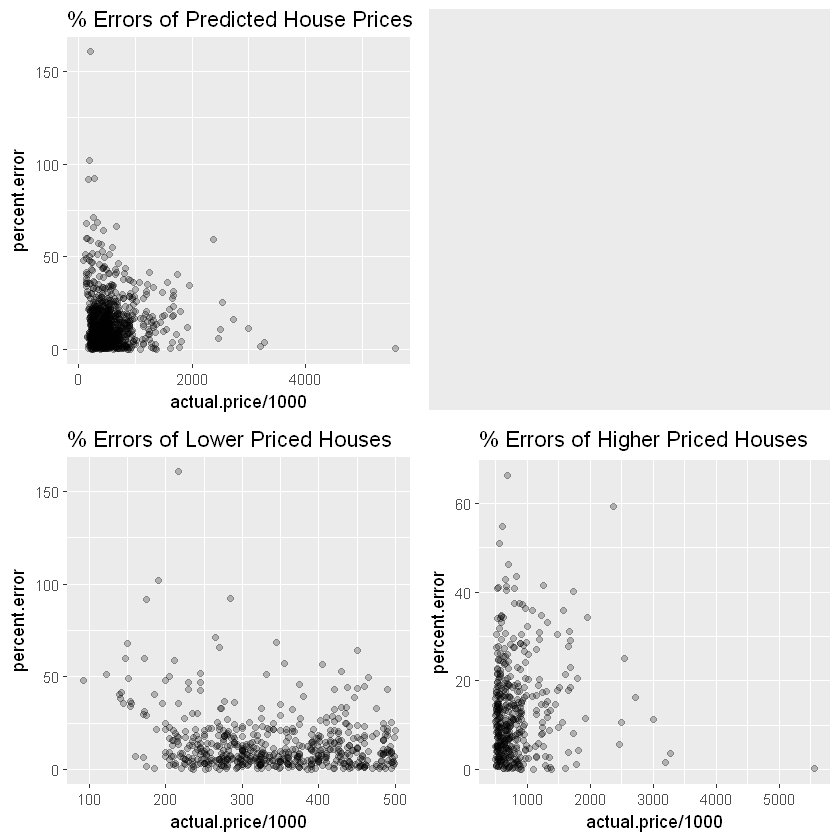

In [45]:
q13 <- ggplot(aes(x = actual.price/1000, y = percent.error ), data = prices) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle('% Errors of Predicted House Prices')

q16 <- ggplot()

q14 <- ggplot(aes(x = actual.price/1000, y = percent.error ), data = lower.prices) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle('% Errors of Lower Priced Houses')

q15 <- ggplot(aes(x = actual.price/1000, y = percent.error ), data = higher.prices) + 
    geom_point(alpha=1/4, position = 'jitter') +
    ggtitle('% Errors of Higher Priced Houses')

grid.arrange(q13,q16 ,q14, q15, ncol=2)

The plots above show the extent of the error in the model's prediction. It shows that **most of the model's prediction is just +/- 25% of the actual price**. 

In terms of the prices, there were around 30 lower priced houses (prices < \$500,000) that were grossly overestimated/underestimated. This is just 3% of the whole dataset.

The model tends to perform well on **more expensive houses** (prices >= \$500,000), as most of its prediction is not too far from the actual price (+/- 20% of the actual price).

## 5. Conclusion

This notebook illustrated using exploratory data analysis and linear regression to predict house prices from a set of features like area, number of rooms, location, etc. Exploratory data analysis proved helpful in creating a model, as it provided insights as to which combination of features are relevant in predicting price. Linear regression on the other hand is a good way to start learning about the different processes involved in performing data analysis.

Specifically, the following competencies were performed:

1. **Using R for Applied Data Analysis**. R is a very powerful tool for both exploring and analyzing the house prices dataset. Working through this is more straightforward and has given me more time to analyze the data and the models I create because of its built-in functions and data types.

2. **Exploratory Data Analysis**. Through the use of R's different functions, it is easier to define the variable types, compute the basic statistics, and analyze the distribution of the dataset's variables. Detecting dependencies and relationship among variables are also easier thanks to methods like `cor()` (correlation) and `chisq.test()` (chi-square test of independence), as well as plotting them through `ggplot2()` and `scatterplotMatrix()`.

3. **Producing and Evaluating a Linear Regression Model**. R's `lm()` function is a very flexible tool in producing basic linear regression models. Knowing the distribution of the variables helped me in creating a better model by using log transform. Knowing their correlation helped me in finding the optimum set of variables to include in the model. Evaluating the robustness of the models is also easier because R displays the p-values of t-test and F-test statistics (lower than 0.05 the better), as well as the its RSE (lower better) and $R^2$ (closer to 1 better). Meanwhile, RMSE (lower better) is used to evaluate the effectiveness of the model in predicting continuous target variables. 